# **Lab 9 - leggi di conservazione: esercizi**

Si consideri il seguente problema di trasporto lineare
</br></br>
$$
\dfrac{\partial u}{\partial t} + \dfrac{\partial (v\,u)}{\partial x} = 0
$$
</br>
sul dominio $\Omega=[0,5]$ e nell'intervallo temporale $(0,5]$.
Scegliamo $v=1$ e dato che la velocità è positiva il bordo di inflow è $x=0$, dove imponiamo la condizione $u=0$. Al bordo destro, $x=5$, non prescriviamo alcuna condizione.

Il dato iniziale è
</br></br>
$$
u_0(x) =
	\begin{cases}
		1 & \text{per}\ 1\le x\le2, \\
		0 & \text{altrimenti}.
	\end{cases}
$$
</br>
Si consideri la seguente $\verb|function|$ che risolve il problema di trasporto con il metodo dei Volumi Finiti:

      def fvsolve(u0, f, df, L, T, h, dt, flux_function)
        #
        return xc, t, u

Questa function prende in **input**: il dato iniziale $u_0$, la funzione di flusso $\verb|f|$, la sua derivata prima $\verb|df|$, la lunghezza $L$ di $\Omega=[0, L]$, il tempo finale $T$, la spaziatura della griglia spaziale: $\verb|h|$, la spaziatura della griglia temporale: $\verb|dt|$, il parametro $\verb|flux_function|$ corrisponde ad una funzione flusso (nel nostro caso sarà quella che implementarà il flusso di *upwind* e *Godunov*). L'**output** consiste in un vettore $\verb|xc|$ dei punti medi delle celle, un vettore degli istanti di tempo discreti $\verb|t|$, una matrice $\verb|u|$ le cui colonne corrispondono ai valori che la soluzione assume ad ogni istante temporale in ogni intervallo di discretizzazione.

In [1]:
from utilis_solver_cl import fvsolve

# Dati del problema 1: trasporto lineare
# velocità
v = 1;
# definire la u_0
u0 = lambda x: 1*(x<2)*(x>1)
# definire la f
f =  lambda u: v*u
# definire la df
df = lambda u: v+0*u
# lunghezza di Omega
L=5
# Istante di tempo finale
T=5

<mark>**Esercizio 1.1**</mark></br>
Calcolare il passo temporale massimo che soddisfa la **condizione CFL** con i dati forniti e il corrispondente numero di passi temporali $N_t$, quando il numero di sottointervalli in cui è suddiviso il dominio spaziale è $N=40$.

In [2]:
# N suddivisione spazio
N = 40
# passo spaziale
h=L/N
# Nt suddivisione temporale
Nt = N
# passo temporale
dt = T/Nt

*Soluzione*

Occupiamoci del passo temporale massimo. Sappiamo dalla teoria che il passo temporale $\Delta t$ deve rispettare la *condizione CFL*, cioè deve essere tale per cui
</br></br>
$$
	\Delta t \leq \frac{h}{C_L},
$$
</br>
dove $|f'(u)|< C_L$ è una opportuna costante.
Nel nostro caso, poiché il problema è lineare, possiamo porre subito
</br></br>
$$
	\Delta t \leq \frac{h}{v},
$$
</br>
ed essendo $v=1$ si deduce che il passo temporale massimo ammissibile è $\Delta t = h$, cioè $\Delta t = 5/40$. Dal momento che il tempo finale è fissato a $T=5$, abbiamo $N_t = 40$ passi temporali.

Scegliendo valori del $\Delta t$ superiori a questo si assiste alla generazione di oscillazioni spurie e a fenomeni di instabilità, che fanno fallire il metodo.

<mark>**Esercizio 1.2**</mark></br>
Implementare una *funzione* che calcoli il flusso numerico per il metodo **upwind** in un dato intervallo. Utilizzare la seguente intestazione:

    def upwind_flux(f, df, uL, uR)
      #
      # implementazione
      #
      return F

dove:

*  $\verb|f|$ e $\verb|df|$ sono due lambda function corrispondenti alla funzione di flusso e alla sua derivata prima

* $\verb|uL|$ e $\verb|uR|$ due vettori contenenti tutti i valori della soluzione all'estremo sinistro e destro, rispettivamente, di ogni cella.

L'output $\verb|F|$ consiste in un vettore contenente tutti i valori del flusso numerico nelle celle della griglia spaziale.

In [3]:
# Implementazione del flusso "alla upwind"
def upwind_flux(f, df, uL, uR):
  """
  Input:
    f  (lambda function)
    df (lambda function)
    uL (numpy.ndarray)
    uR (numpy.ndarray)
  Output:
    F (numpy.ndarray)
  """
  if(min(df(uL))>=0 and min(df(uR))>=0):
    F = f(uL)
  else:
    F = f(uR)
  return F

  def upwind_flux_for(f,df,uL,uR):
    """
    Input:
      f  (lambda function)
      df (lambda function)
      uL (numpy.ndarray)
      uR (numpy.ndarray)
    Output:
      F (numpy.ndarray)
    """
    F=[]
    for i in range(len(uL)):
      if (df(uL[i])*df(uR[i])<0):
        raise RuntimeError('Il metodo upwind non si può applicare')
      else:
        if (df(uL[i])>=0):
            F.append(f(uL[i]))
        else:
            F.append(f(uR[i]))

    return np.array(F)



<mark>**Esercizio 1.3**</mark></br>
Risolvere il problema dato scegliendo $N_t$, $N_t-1$, $2N_t$ passi temporali.

Plottare i grafici delle soluzioni approssimate utilizzando la function $\verb|xtplot|$ in **utilis_plot_cl.py** e commentare i risultati ottenuti.


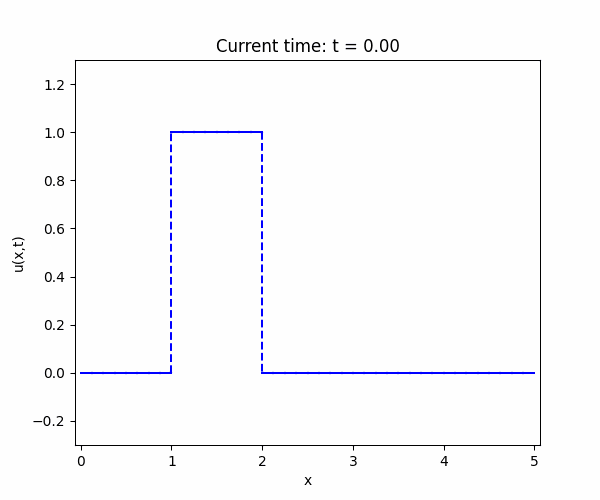

In [4]:
from utilis_plot_cl import xtplot
import numpy as np
# rappresentazione grafica per Nt
dt = T/Nt

xc, t, u = fvsolve(u0, f, df, L, T, h, dt, upwind_flux)
xtplot(xc, t, u, 'animation')
#xtplot(xc, t, u, 'surface')

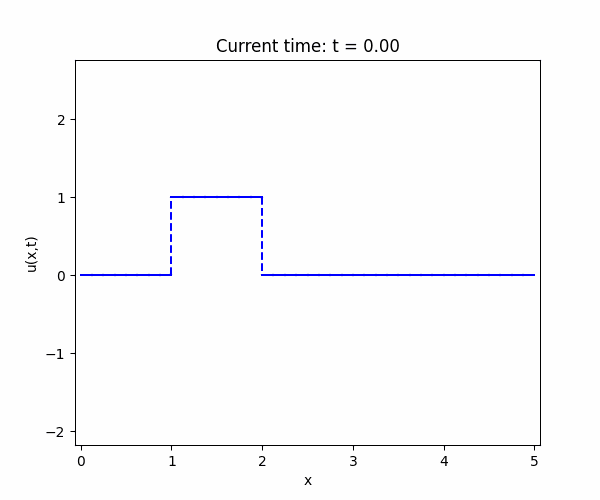

In [5]:
# rappresentazione grafica per Nt-1
dt = T/(Nt-1)

xc, t, u = fvsolve(u0, f, df, L, T, h, dt, upwind_flux)
xtplot(xc, t, u, 'animation')
#xtplot(xc, t, u, 'surface')

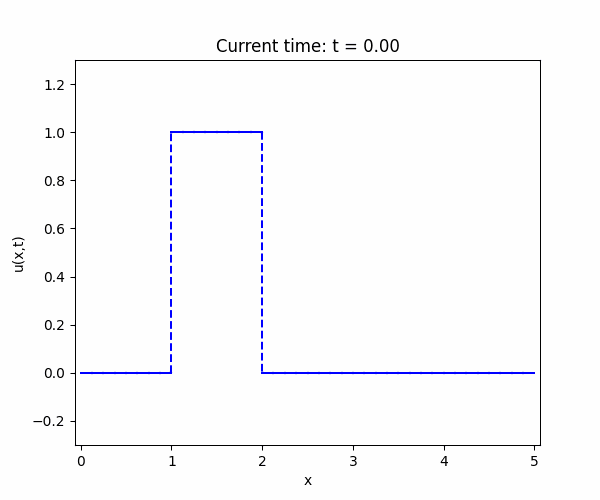

In [6]:
# rappresentazione grafica per 2*Nt
dt = T/(2*Nt)

xc, t, u = fvsolve(u0, f, df, L, T, h, dt, upwind_flux)
xtplot(xc, t, u, 'animation')
#xtplot(xc, t, u, 'surface')

<mark>**Esercizio 2**</mark></br>
Si consideri ora l'equazione di Burgers:
</br></br>
$$
\dfrac{\partial u}{\partial t} + \dfrac{\partial}{\partial x} \left(\dfrac{u^2}{2}\right)= 0
$$
sul dominio $\Omega=[0,5]$ e nell'intervallo temporale $(0,10]$, con condizione iniziale
</br></br>
$$
	u_0(x) =
	\begin{cases}
		4(x-1)(2-x) & \text{per}\ 1\le x\le2, \\
		0 & \text{altrimenti}.
	\end{cases}
$$
</br>
Anche in questo caso imponiamo la condizione di Dirichlet sul bordo sinistro, $u(0,t)\equiv u(0,0)$ per ogni $t\in(0,10]$. Osserviamo quindi che, più in generale, se $u\ge0$, anche in questo caso il bordo sinistro è di inflow.


<mark>**Esercizio 2.1**</mark></br>
Rappresentare in un grafico l'andamento della funzione flusso $f(u)$ e della sua derivata prima $f^\prime(u)$ per $0\leq u\leq 1$.


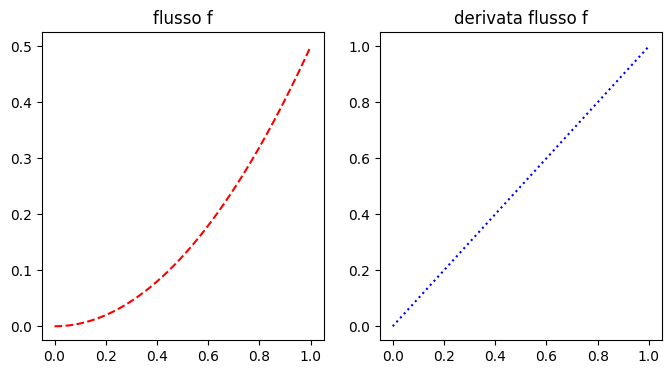

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Dati del problema
# definire la u_0
u0 = lambda x: -4*(x-1)*(x-2)*(x<2)*(x>1)
# definire la f
f =  lambda u: 0.5*u*u
# definire la df
df = lambda u: u
# lunghezza di Omega
L=5
# Istante di tempo finale
T=10

xx= np.linspace(0,1,1000)
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(xx,f(xx),'--r')
plt.title('flusso f')
plt.subplot(122)
plt.plot(xx,df(xx),':b')
plt.title('derivata flusso f');
plt.show()


*Soluzione*

La funzione di flusso $f(u) = u^2/2$ rappresenta un arco di parabola nell'intervallo $[0,1]$, monotona crescente. La derivata è rappresentata dalla retta $f'(u)=u$.

<mark>**Esercizio 2.2**</mark></br>
In base ai risultati del punto precedente, il metodo Upwind è applicabile? Risolvere il problema prendendo $N=40$ e $Nt=80$.

*Soluzione*

La funzione di flusso è monotona crescente in senso stretto nell'intervallo $[0,1]$ e la sua derivata è dunque sempre positiva. Il metodo Upwind è applicabile.

Affinché il metodo rimanga stabile, cioé venga rispettata la **condizione CFL**, occorre che $C_L \geq 1$, dal momento che $|f'(u)|\leq 1 $. Il numero di passi temporali necessari è dato da $N_t = \frac{T}{\Delta t}$. Assumendo di prendere $\Delta t = h = 5/40$ si ottiene $N_t = 80$ passi temporali.

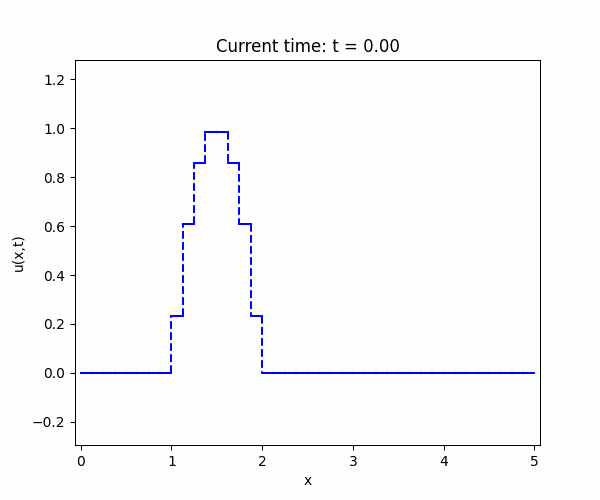

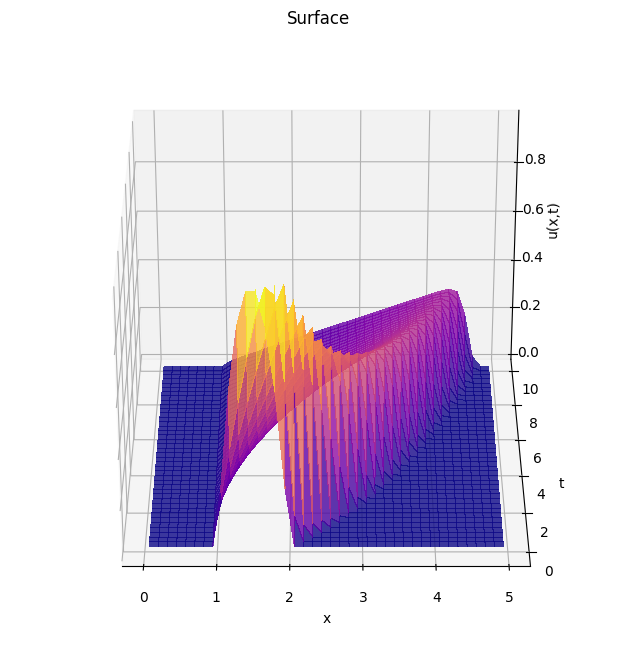

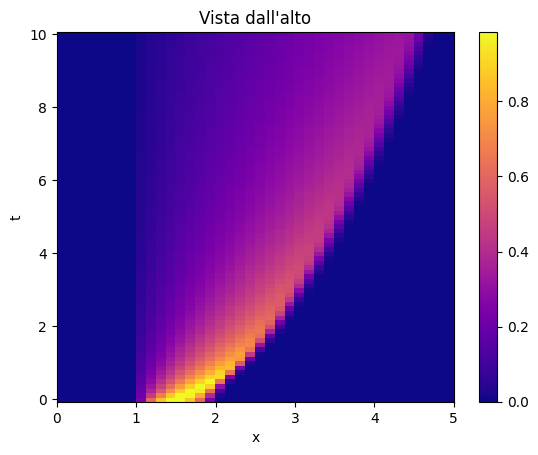

In [8]:
# N suddivisione spazio
N=40
# passo spaziale
h=L/N
# Nt suddivisione temprale
Nt = 2*N

# rappresentazione grafica per Nt
dt = T/Nt
xc, t, u = fvsolve(u0, f, df, L, T, h, dt, upwind_flux)
xtplot(xc, t, u, 'animation')
xtplot(xc, t, u, 'surface')


<mark>**Esercizio 3**</mark></br>
Si consideri ora l'equazione del traffico
</br></br>
$$
\dfrac{\partial u}{\partial t} + \dfrac{\partial }{\partial x}f(u)=0
$$
</br>
sul dominio $\Omega=[0, 5]$ e nell'intervallo temporale $(0,10]$.
Qui la funzione f è la seguente:
</br></br>
$$f(u)=v\,u\left(1-\dfrac{u}{u_{max}}\right).$$
</br>
$v$ indica una velocità che viene modulata in funzione della densità di auto $u$. In particolare quando $u$ raggiunge il valore massimo $u_{max}$ il flusso si annulla (traffico bloccato).


<mark>**Esercizio 3.1**</mark></br>
Dopo aver scelto $v=1$ e $u_{max}=1$, rappresentare la funzione flusso e la sua derivata per $0\leq u \leq 1$.


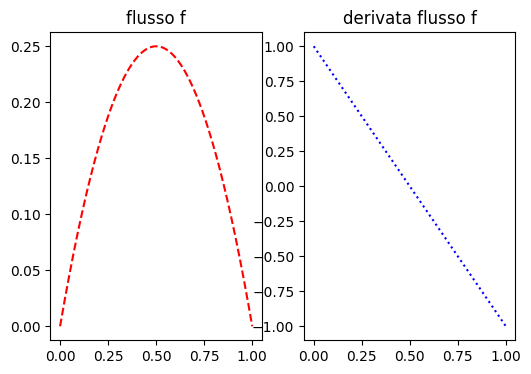

In [9]:
# Dati del problema
v = 1;
umax = 1;
# definire la f
f =  lambda u: v*u*(1-u/umax);
# definire la df
df = lambda u: v*(1-2*u/umax);

plt.figure(figsize=(6,4))
plt.subplot(121)
plt.plot(xx,f(xx),'--r')
plt.title('flusso f')
plt.subplot(122)
plt.plot(xx,df(xx),':b')
plt.title('derivata flusso f');
plt.show()


<mark>**Esercizio 3.2**</mark></br> In base al punto precedente, il metodo Upwind è applicabile?


*Soluzione*

Il flusso non è monotono, pertanto la sua derivata non ha segno costante. Upwind non è applicabile.

<mark>**Flusso di Godunov**</mark></br>

Si consideri la funzione $\verb|godunov_flux|$ che implementa il calcolo del flusso numerico *Godunov*.

In [10]:
# Implementazione del flusso di Godunov
def godunov_flux(f, df, uL, uR):

  iL, iR = [], []
  for i in range(len(uL)):
      iL.append(min(uL[i],uR[i]))
      iR.append(max(uL[i],uR[i]))

  iL = np.array([iL])
  iR = np.array([iR])

  g = np.linspace(0, 1, 1000)
  g=np.array([g])
  itot = f(iL.T@g + iR.T@(1-g))
  imins = np.min(itot, axis=1)
  imaxs = np.max(itot, axis=1)
  candidates = imins
  dir = np.sign(uR-uL)
  candidates[np.where(dir<0)] = imaxs[np.where(dir<0)]
  F = candidates

  return F

<mark>**Esercizio 3.3**</mark></br>

Applicando il flusso numerico di *Godunov*, risolvere il problema del traffico con coda al semaforo, descritto dalla condizione iniziale
</br></br>
$$
	u_0(x) =
	\begin{cases}
		u_{max} & \text{per}\ x\le2, \\
		\frac{1}{8}u_{max} & \text{per}\ x>2
	\end{cases}
$$
</br>
e prendendo $N=40$ e $N_t=80$. Cosa si osserva?

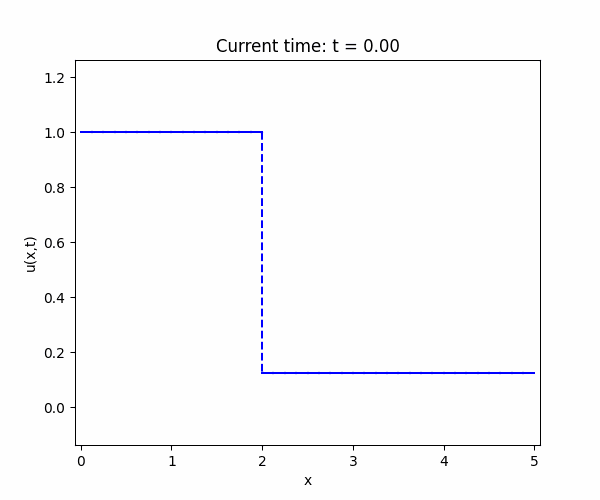

In [11]:
# definire la u_0
u0 = lambda x: 1.0*(x<=2)+1/8*(x>2);
L=5
# N suddivisione spazio
N=40
# passo spaziale
h=L/N
# tempo finale
T=10
# scelta de Nt
Nt=80
# scelta di dt
dt=T/Nt


xc, t, u = fvsolve(u0, f, df, L, T, h, dt, godunov_flux);
xtplot(xc, t, u, 'animation')


Questo simula il comportamento di una colonna di macchine in partenza da un semaforo rosso.

<mark>**Esercizio 3.4**</mark></br>
Risolvere il problema del traffico con condizione iniziale
</br></br>
$$
	u_0(x) =
	\begin{cases}
		\frac{1}{8}u_{max} & \text{per}\ x\le2, \\
		u_{max} & \text{per}\ x>2
	\end{cases}
$$
</br>
con gli stessi dati di prima. Cosa si osserva?

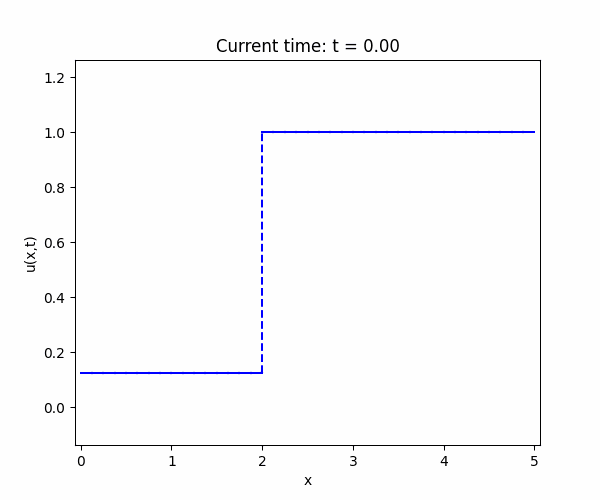

In [12]:
# definire la u_0
u0 = lambda x: 1.0*(x>2)+1/8*(x<=2);

xc, t, u = fvsolve(u0, f, df, L, T, h, dt, godunov_flux);
xtplot(xc, t, u, 'animation')

*Soluzione*

Invertendo i coefficienti sulla condizione iniziale si ottiene, in modo totalmente analogo, una simulazione che questa volta rappresenta la creazione di una colonna di macchina che rallentano fino a fermarsi.